<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-models-of-different-polynomial-order" data-toc-modified-id="Create-models-of-different-polynomial-order-1">Create models of different polynomial order</a></span></li><li><span><a href="#Golden-Rectangles" data-toc-modified-id="Golden-Rectangles-2">Golden Rectangles</a></span></li></ul></div>

# Data Science 'fun'

In [16]:
%%html
<style>
body {
#     font-family: "Comic Sans MS", cursive, sans-serif;
   font-family: "Bradley Hand", cursive, sans-serif;


}
</style>  

In [17]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
plt.xkcd();

In [8]:
rcParams = plt.rcParams
font_size = 14
rcParams['font.size'] = font_size
rcParams['axes.labelsize'] = font_size
rcParams['xtick.labelsize'] = font_size
rcParams['ytick.labelsize'] = font_size
rcParams['legend.fontsize'] = font_size

In [19]:
#http://alimanfoo.github.io/2016/05/31/matplotlib-xkcd.html
def draw_stick_figure(ax, x=.5, y=.5, radius=.03, quote=None, color='k', lw=2, xytext=(0, 20)):
    
    # draw the head
    head = plt.Circle((x, y), radius=radius, transform=ax.transAxes, 
                      edgecolor=color, lw=lw, facecolor='none', zorder=10)
    ax.add_patch(head)
    
    # draw the body
    body = plt.Line2D([x, x], [y-radius, y-(radius * 4)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(body)
    
    # draw the arms
    arm1 = plt.Line2D([x, x+(radius)], [y-(radius * 1.5), y-(radius*5)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(arm1)
    arm2 = plt.Line2D([x, x-(radius * .8)], [y-(radius * 1.5), y-(radius*5)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(arm2)
    
    # draw the legs
    leg1 = plt.Line2D([x, x+(radius)], [y-(radius * 4), y-(radius*8)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(leg1)
    leg2 = plt.Line2D([x, x-(radius*.5)], [y-(radius * 4), y-(radius*8)], 
                      color=color, lw=lw, transform=ax.transAxes)
    ax.add_line(leg2)
    
    # say something
    if quote:
        ax.annotate(quote, xy=(x+radius, y+radius), xytext=xytext,
                    xycoords='axes fraction', textcoords='offset points',
                    arrowprops=dict(arrowstyle='-', lw=1))
    

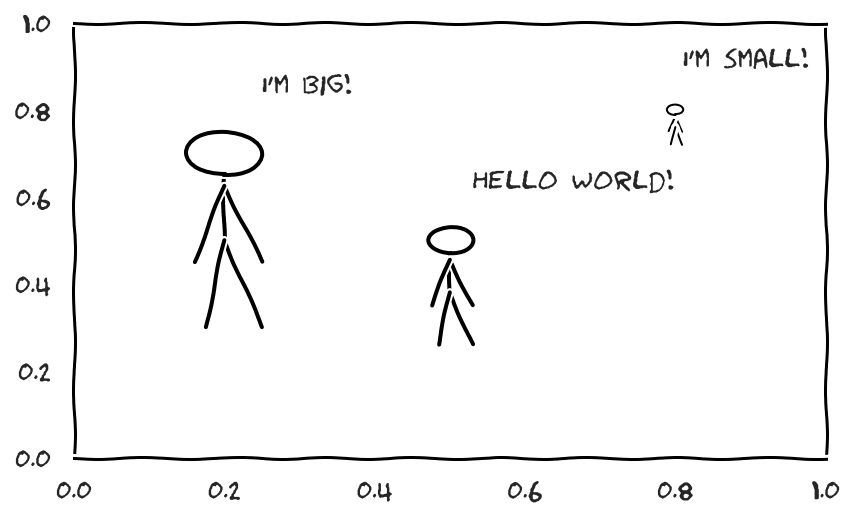

In [20]:
fig, ax = plt.subplots()
draw_stick_figure(ax, quote='Hello World!')
draw_stick_figure(ax, x=.8, y=.8, radius=.01, quote="I'm small!", lw=1)
draw_stick_figure(ax, x=.2, y=.7, radius=.05, quote="I'm big!", lw=2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'close'
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'close'
/anaconda3/lib/python3.6/site-packages/ipyke

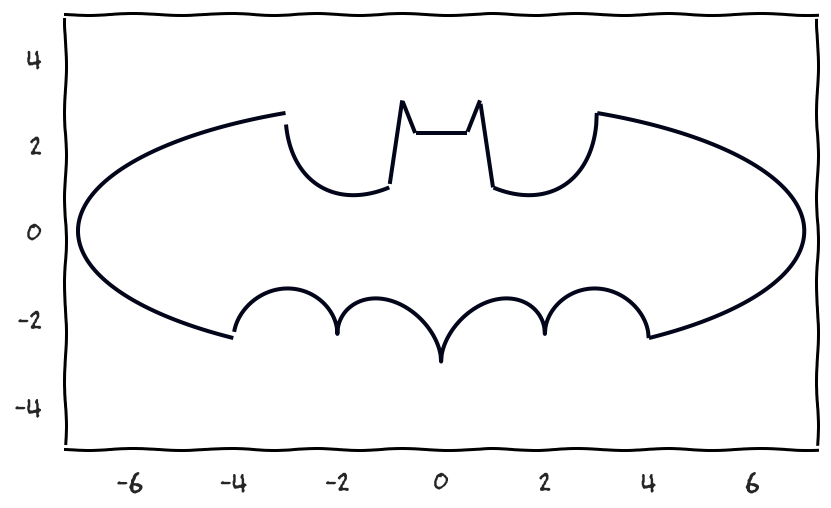

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 16 09:30:30 2011

Python Batman Equation

@author: Trae Blain
"""
from __future__ import division
import matplotlib.pyplot as plt
from numpy import sqrt #originally had from scipy import sqrt
from numpy import meshgrid
from numpy import arange

xs = arange(-7.25, 7.25, 0.01)
ys = arange(-5, 5, 0.01)
x, y = meshgrid(xs, ys)

eq1 = ((x/7)**2*sqrt(abs(abs(x)-3)/(abs(x)-3))+(y/3)**2*sqrt(abs(y+3/7*sqrt(33))/(y+3/7*sqrt(33)))-1)
eq2 = (abs(x/2)-((3*sqrt(33)-7)/112)*x**2-3+sqrt(1-(abs(abs(x)-2)-1)**2)-y)
eq3 = (9*sqrt(abs((abs(x)-1)*(abs(x)-.75))/((1-abs(x))*(abs(x)-.75)))-8*abs(x)-y)
eq4 = (3*abs(x)+.75*sqrt(abs((abs(x)-.75)*(abs(x)-.5))/((.75-abs(x))*(abs(x)-.5)))-y)
eq5 = (2.25*sqrt(abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*sqrt(10)/7+(1.5-.5*abs(x))*sqrt(abs(abs(x)-1)/(abs(x)-1))-(6*sqrt(10)/14)*sqrt(4-(abs(x)-1)**2)-y)

#eq1 = ((x/7.0)**2.0*sqrt(abs(abs(x)-3.0)/(abs(x)-3.0))+(y/3.0)**2.0*sqrt(abs(y+3.0/7.0*sqrt(33.0))/(y+3.0/7.0*sqrt(33.0)))-1.0)

for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    plt.contour(x, y, f, [0], close=True)

plt.show()

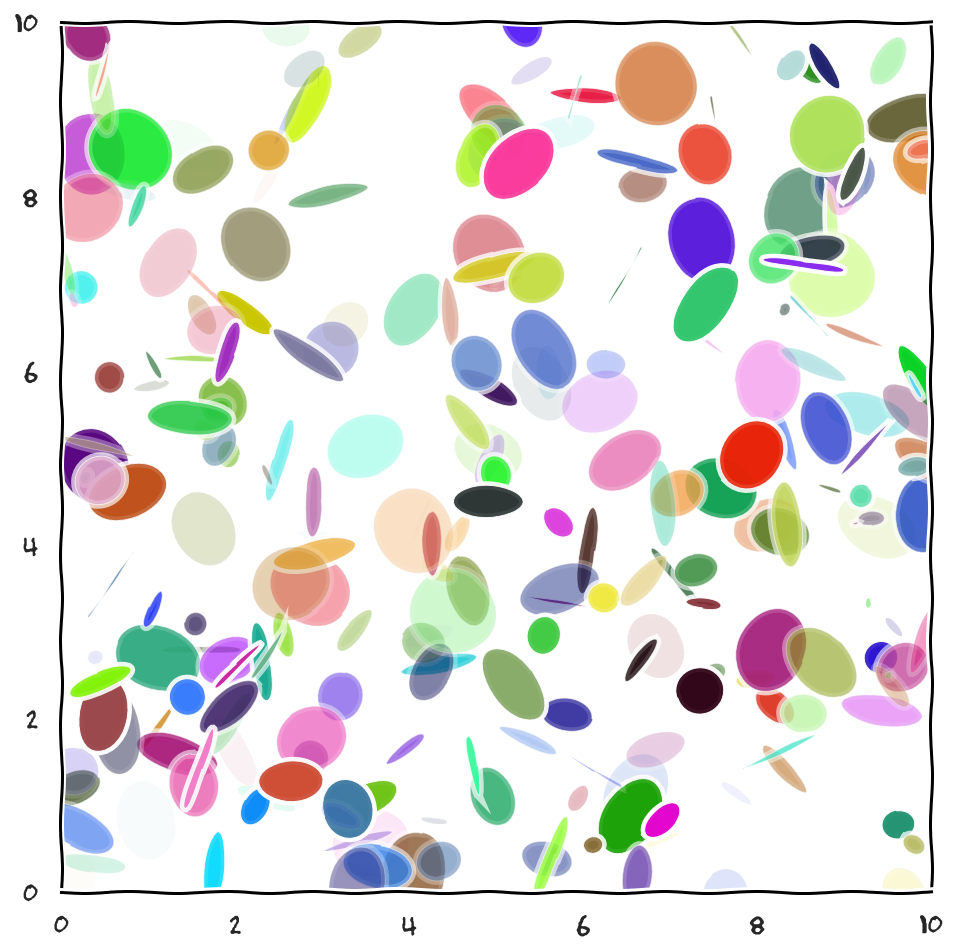

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(8,8))

for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

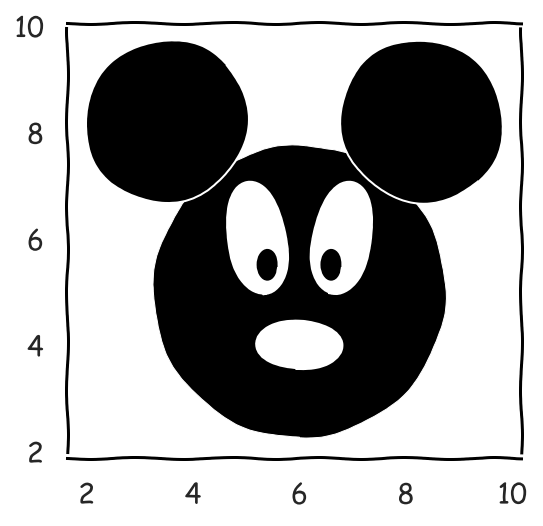

In [93]:
# from matplotlib.patches import Ellipse

plt.figure()
ax = plt.gca()

ellipse1 = Ellipse(xy=(8.3,8.2), width=2.9, height=3,angle=45,
                         fc='black', lw=2, edgecolor='black')
ellipse2 = Ellipse(xy=(3.5,8.2), width=2.9, height=3,angle=135,
                        fc='black', lw=2, edgecolor='black')
circle = plt.Circle((6, 5), radius=2.75, fc='black')
ellipse3 = Ellipse(xy=(5.2,6), width=1, height=2,angle=10,
                         fc='white', lw=2, edgecolor='white')
ellipse4 = Ellipse(xy=(5.4,5.5), width=.5, height=.3,angle=90,
                         fc='black', lw=2, edgecolor='black')
ellipse5 = Ellipse(xy=(6.8,6), width=1, height=2,angle=-10,
                         fc='white', lw=2, edgecolor='white')
ellipse6 = Ellipse(xy=(6.6,5.5), width=.5, height=.3,angle=90,
                         fc='black', lw=2, edgecolor='black')
ellipse7 = Ellipse(xy=(6,4), width=1.5, height=.8,angle=0,
                         fc='white', lw=2, edgecolor='white')
plt.gca().add_patch(circle)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(ellipse3)
ax.add_patch(ellipse4)
ax.add_patch(ellipse5)
ax.add_patch(ellipse6)
ax.add_patch(ellipse7)
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)
plt.axis('scaled')
plt.show()

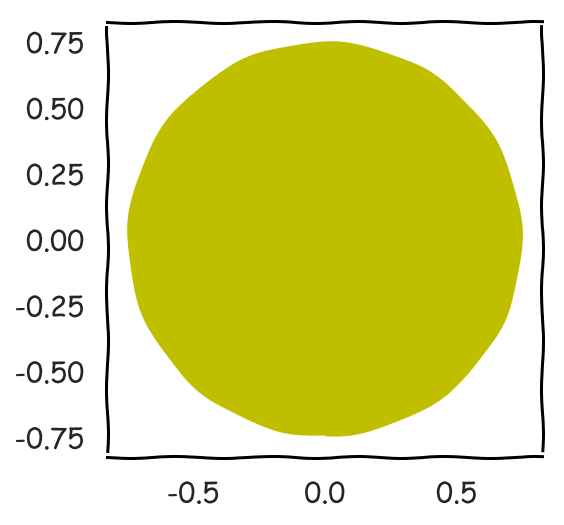

In [20]:
## import matplotlib.pyplot as plt

plt.axes()

circle = plt.Circle((0, 0), radius=0.75, fc='y')
plt.gca().add_patch(circle)

plt.axis('scaled')
plt.show()

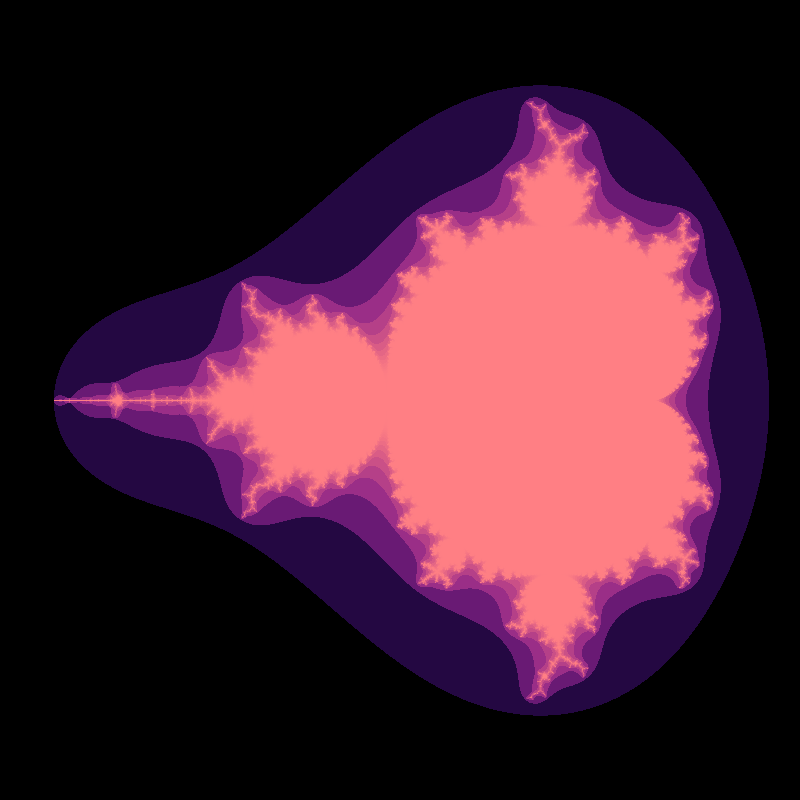

In [41]:
#!/usr/bin/python
from PIL import Image, ImageDraw#, #math,colorsys
import colorsys

dimensions = (800, 800)
scale = 1.0/(dimensions[0]/3)
center = (2.2, 1.5)       # Use this for Mandelbrot set
#center = (1.5, 1.5)       # Use this for Julia set
iterate_max = 100
colors_max = 50

img = Image.new("RGB", dimensions)
d = ImageDraw.Draw(img)

# Calculate a tolerable palette
palette = [0] * colors_max
for i in range(colors_max):
    f = 1-abs((float(i)/colors_max-1)**15)
    r, g, b = colorsys.hsv_to_rgb(.66+f/3, 1-f/2, f)
    palette[i] = (int(r*255), int(g*255), int(b*255))

# Calculate the mandelbrot sequence for the point c with start value z
def iterate_mandelbrot(c, z = 0):
    for n in range(iterate_max + 1):
        z = z*z +c
        if abs(z) > 2:
            return n
    return None

# Draw our image
for y in range(dimensions[1]):
    for x in range(dimensions[0]):
        c = complex(x * scale - center[0], y * scale - center[1])

        n = iterate_mandelbrot(c)            # Use this for Mandelbrot set
        #n = iterate_mandelbrot(complex(0.3, 0.6), c)  # Use this for Julia set

        if n is None:
            v = 1
        else:
            v = n/100.0

        d.point((x, y), fill = palette[int(v * (colors_max-1))])

del d
img.save("result.png")
img

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


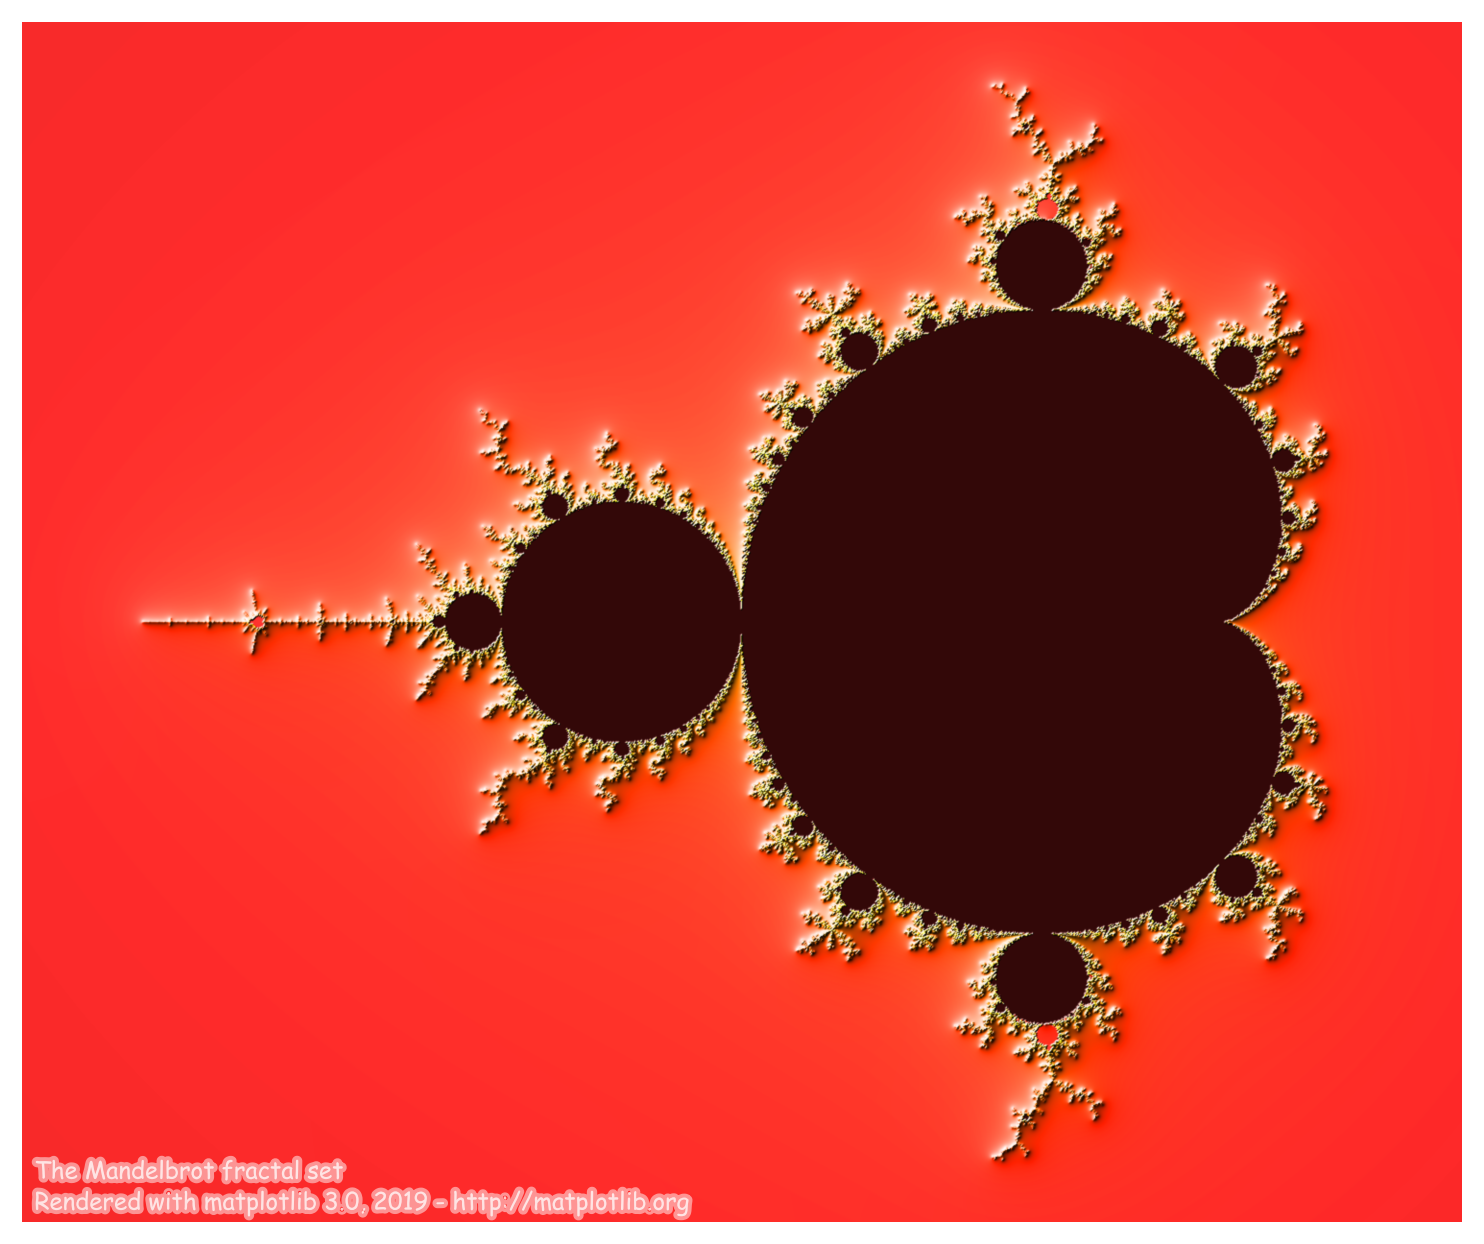

In [42]:
"""
===================================
Shaded & power normalized rendering
===================================

The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The `maxiter` gives the precision of the computation. `maxiter=200` should
take a few seconds on most modern laptops.
"""
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

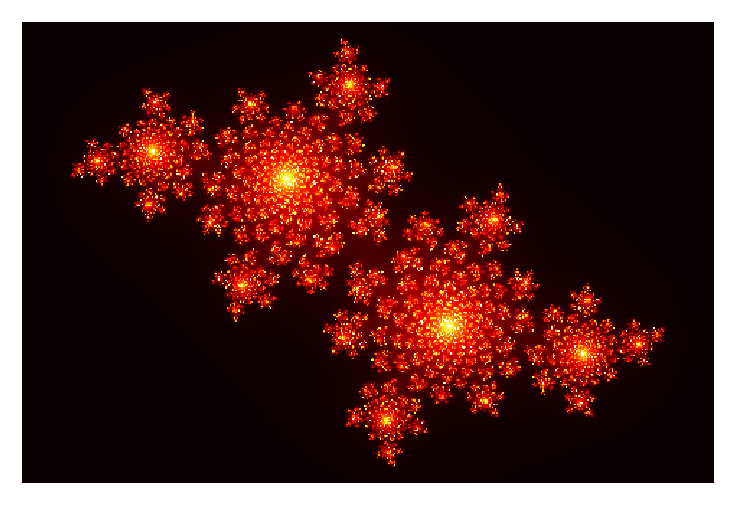

In [45]:
from __future__ import division
 
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
 
m = 480
n = 320
 
s = 300  # Scale.
x = np.linspace(-m / s, m / s, num=m).reshape((1, m))
y = np.linspace(-n / s, n / s, num=n).reshape((n, 1))
Z = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
 
C = np.full((n, m), -0.4 + 0.6j)
M = np.full((n, m), True, dtype=bool)
N = np.zeros((n, m))
for i in range(256):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > 2] = False
    N[M] = i
 
# misc.imsave('julia-m.png', np.flipud(1 - M))
# misc.imsave('julia.png', np.flipud(255 - N))
 
# Save with Matplotlib using a colormap.
fig = plt.figure()
fig.set_size_inches(m / 100, n / 100)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(np.flipud(N), cmap='hot')
plt.savefig('julia-plt.png')
plt.show()


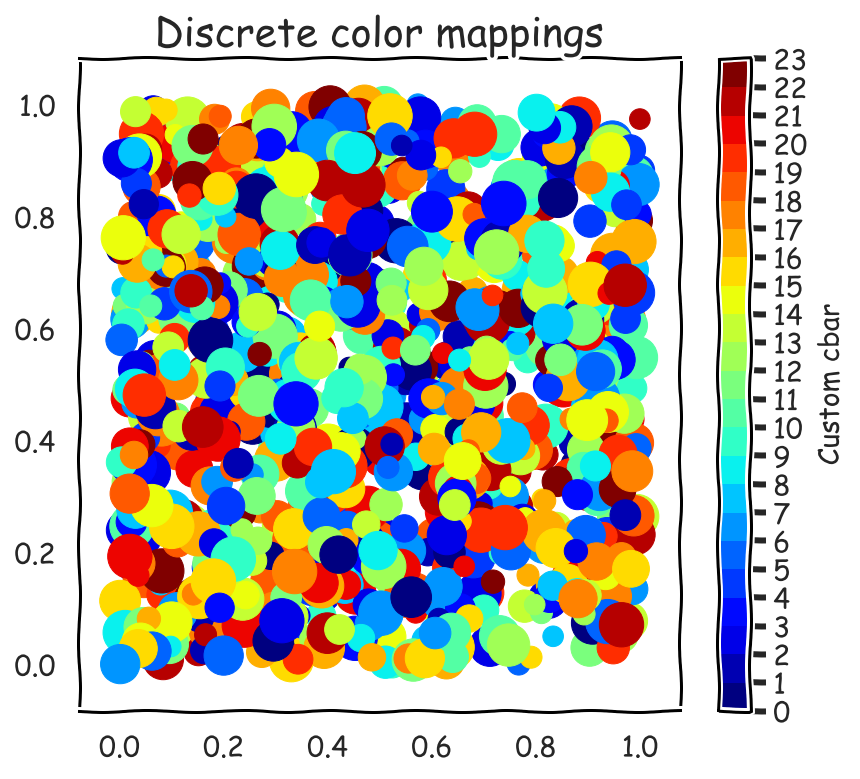

In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N = 23 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = np.random.rand(1000)
y = np.random.rand(1000)
tag = np.random.randint(0,N,1000) # Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
plt.show()
# https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels/12487355

In [51]:
# Python code for Julia Fractal 
from PIL import Image 

# driver function 
if __name__ == "__main__": 
	
	# setting the width, height and zoom 
	# of the image to be created 
	w, h, zoom = 1920,1080,1

	# creating the new image in RGB mode 
	bitmap = Image.new("RGB", (w, h), "white") 

	# Allocating the storage for the image and 
	# loading the pixel data. 
	pix = bitmap.load() 
	
	# setting up the variables according to 
	# the equation to create the fractal 
	cX, cY = -0.7, 0.27015
	moveX, moveY = 0.0, 0.0
	maxIter = 255

	for x in range(w): 
		for y in range(h): 
			zx = 1.5*(x - w/2)/(0.5*zoom*w) + moveX 
			zy = 1.0*(y - h/2)/(0.5*zoom*h) + moveY 
			i = maxIter 
			while zx*zx + zy*zy < 4 and i > 1: 
				tmp = zx*zx - zy*zy + cX 
				zy,zx = 2.0*zx*zy + cY, tmp 
				i -= 1

			# convert byte to RGB (3 bytes), kinda 
			# magic to get nice colors 
			pix[x,y] = (i << 21) + (i << 10) + i*8

	# to display the created fractal 
	bitmap.show() 



In [5]:
df = pd.read_csv(
    '/Users/maartenk/Documents/git/DsMasterClass/dataset-collection/auto-mpg/auto-mpg.csv', sep='\s+', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']
df.drop(df[df.horsepower == '?'].index, inplace=True)
df['horsepower'] = df.horsepower.astype(float)
df['brand'] = df.name.map(lambda x: x.split(' ')[0]
                          ).replace(
    {'toyouta': 'toyota',
     'maxda': 'mazda',
     'chevroelt': 'chevrolet',
     'vw': 'volkswagen',
     'vokswagen': 'volkswagen',
     'mercedes-benz': 'mercedes'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
brand           392 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


In [6]:
df['american'] = df.origin.map(lambda x: 1 if x == 1 else 0)
df['european'] = df.origin.map(lambda x: 1 if x == 2 else 0)
df['asian'] = df.origin.map(lambda x: 1 if x == 3 else 0)

american_mpg = df.mpg[df.american == 1]
european_mpg = df.mpg[df.european == 1]
asian_mpg = df.mpg[df.asian == 1]

In [7]:
target = 'mpg'
y = df[target]

In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [9]:
scaler = StandardScaler()
predictors = scaler.fit_transform(df[['horsepower']])

## Create models of different polynomial order

In [10]:
poly = {}
poly_predictors = {}
for i in range(1, 4):
    poly[i] = PolynomialFeatures(degree=i, include_bias=False)
    poly_predictors[i] = poly[i].fit_transform(predictors)
    print(i, poly[i].get_feature_names())

1 ['x0']
2 ['x0', 'x0^2']
3 ['x0', 'x0^2', 'x0^3']


In [15]:
i = 2
model = {}
for i in range(1, 4):
    with pm.Model() as model[i]:
        prior_std = 10
        std = pm.HalfCauchy('error_std', beta=10)
        intercept = pm.Normal('intercept', mu=0., sd=prior_std)
        beta = pm.Normal('beta', mu=0., sd=prior_std,
                         shape=poly_predictors[i].shape[1])
        y_hat = pm.Normal('y_hat',
                          mu=intercept+pm.math.dot(poly_predictors[i], beta),
                          sd=std,
                          observed=y.values)

In [16]:
model

{1: <pymc3.model.Model at 0x1c1f60f8d0>,
 2: <pymc3.model.Model at 0x1c207fdf60>,
 3: <pymc3.model.Model at 0x1c20bb5da0>}

In [17]:
trace = {}
for i in range(1, 4):
    with model[i]:
        trace[i] = pm.sample(5000, njobs=2, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, intercept, error_std]
Sampling 2 chains: 100%|██████████| 12000/12000 [00:04<00:00, 2664.04draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, intercept, error_std]
Sampling 2 chains: 100%|██████████| 12000/12000 [00:12<00:00, 983.29draws/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, intercept, error_std]
Sampling 2 chains: 100%|██████████| 12000/12000 [00:17<00:00, 651.18draws/s]


In [18]:
trace[1][0]

{'error_std_log__': 1.5883967562275985,
 'intercept': 23.994889515956505,
 'beta': array([-6.0211102]),
 'error_std': 4.895893322304243}

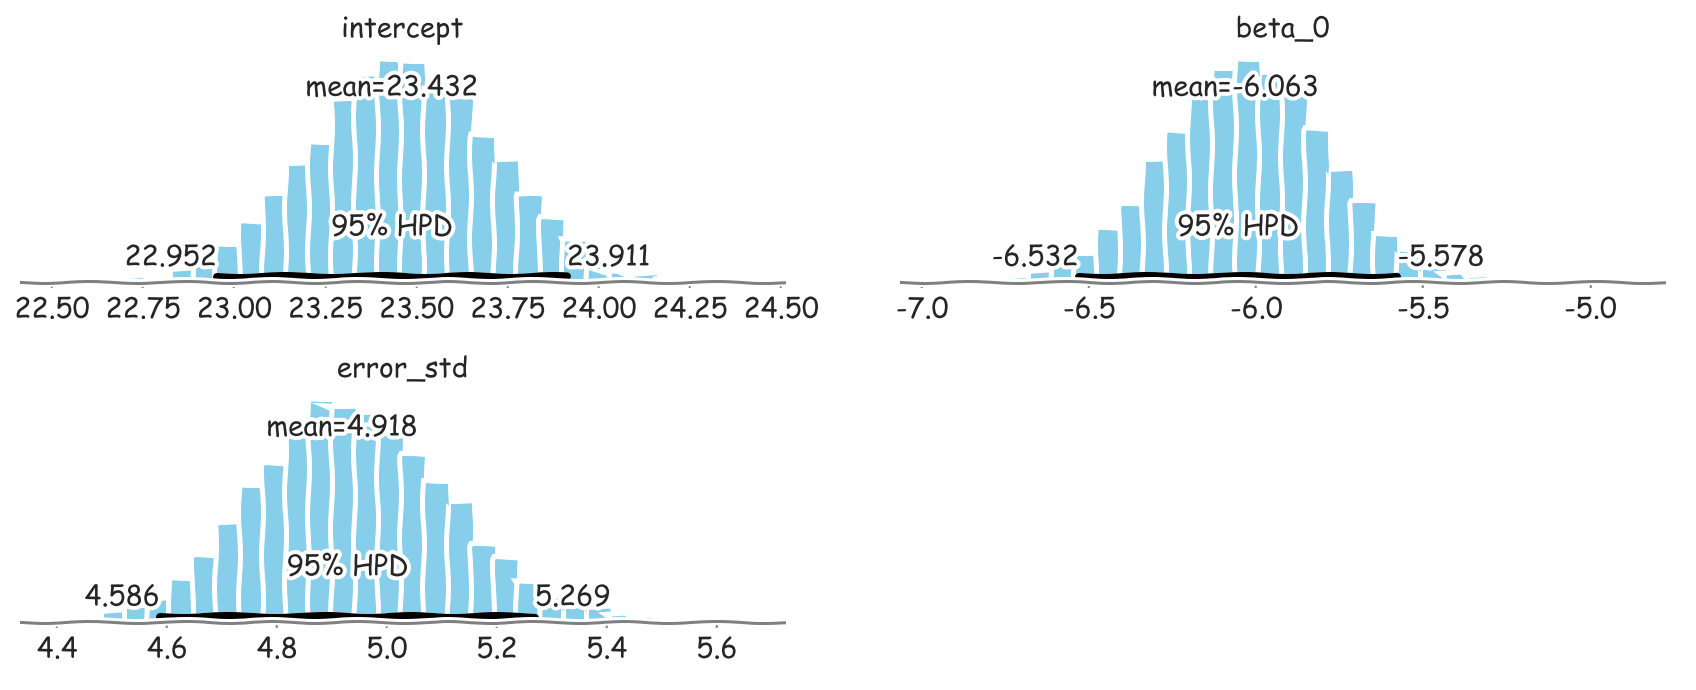

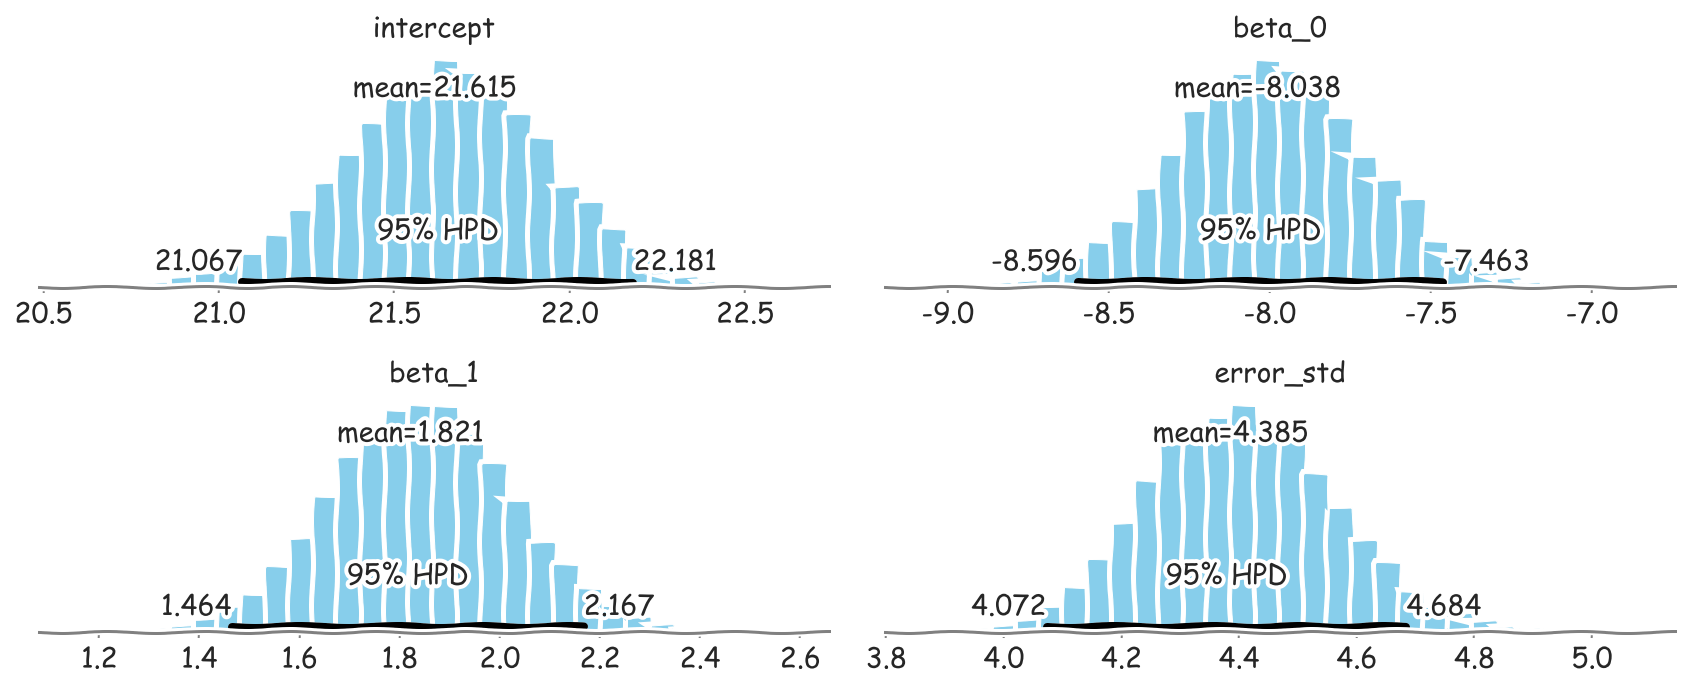

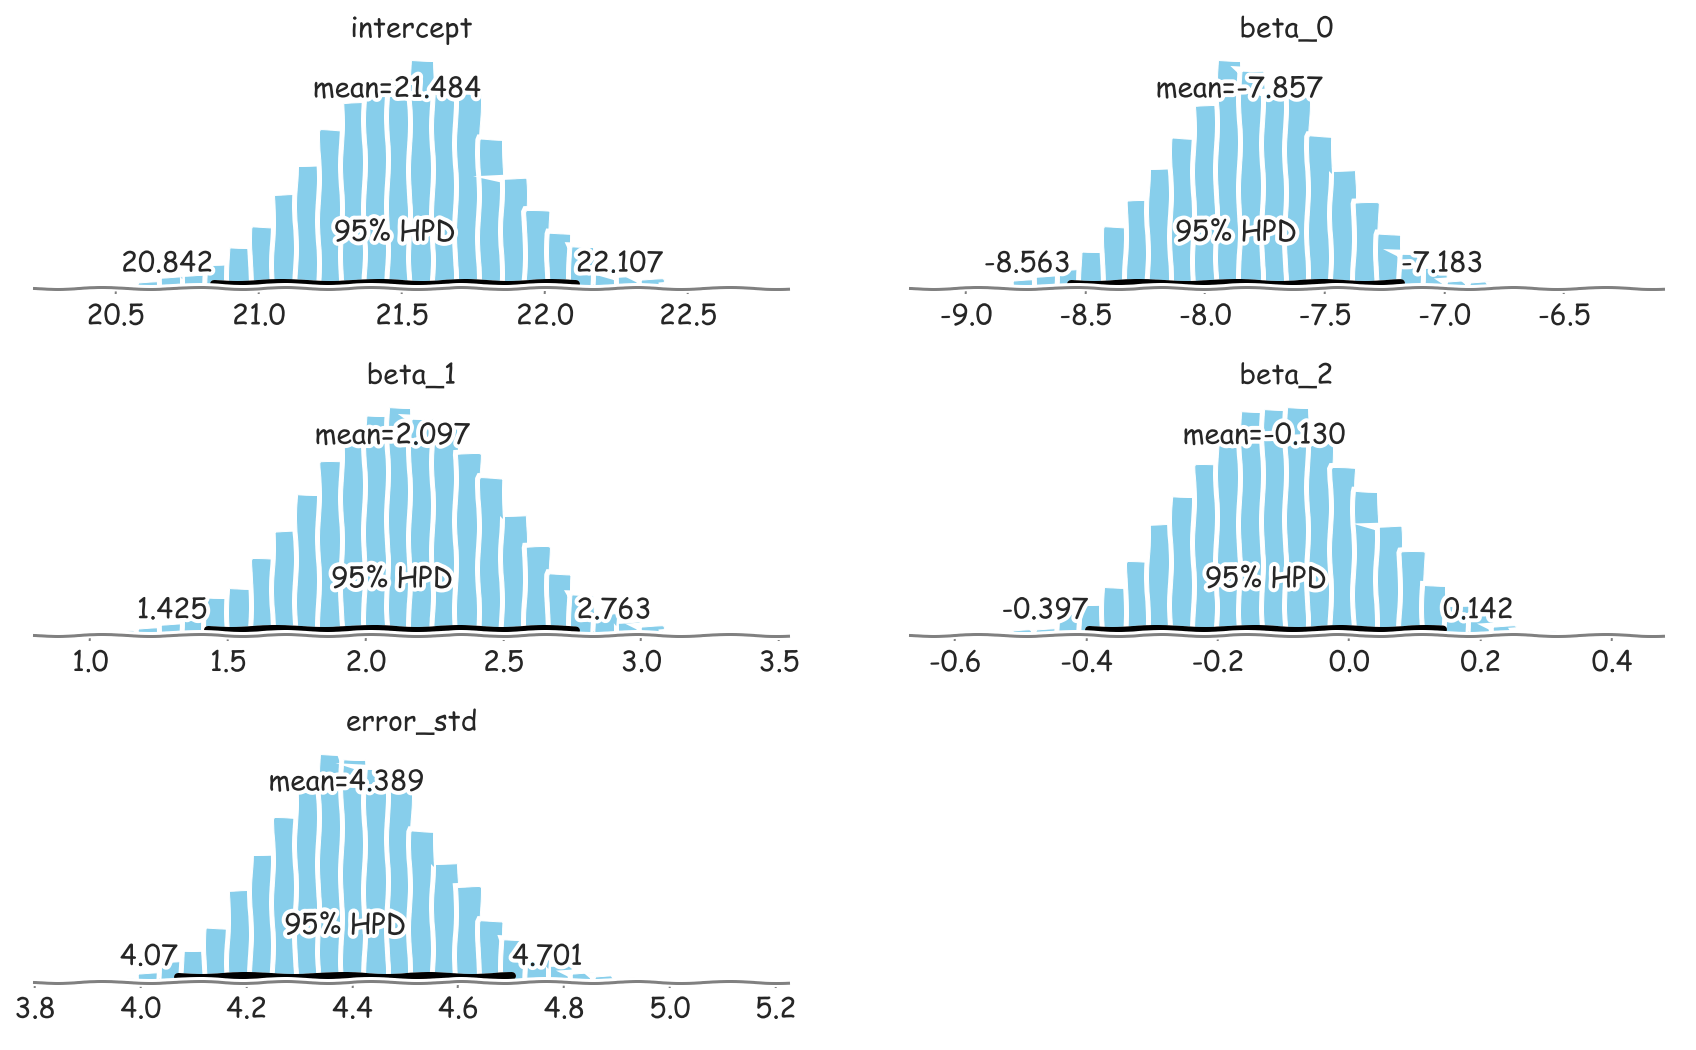

In [19]:
for i in range(1, 4):
    pm.plot_posterior(trace[i])
plt.show()

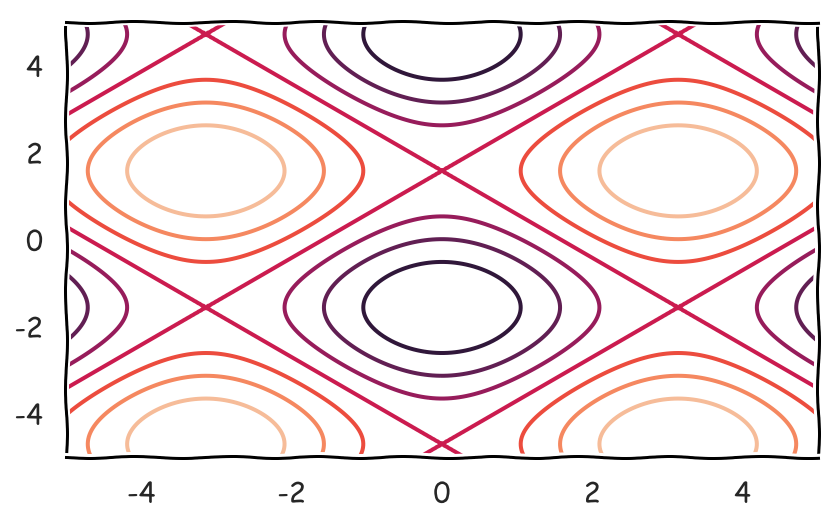

In [22]:
ys, xs = np.mgrid[-5:5:200j, -5:5:200j]
density = np.sin(ys)-np.cos(xs)
plt.figure()
plt.contour(xs, ys, density);
#

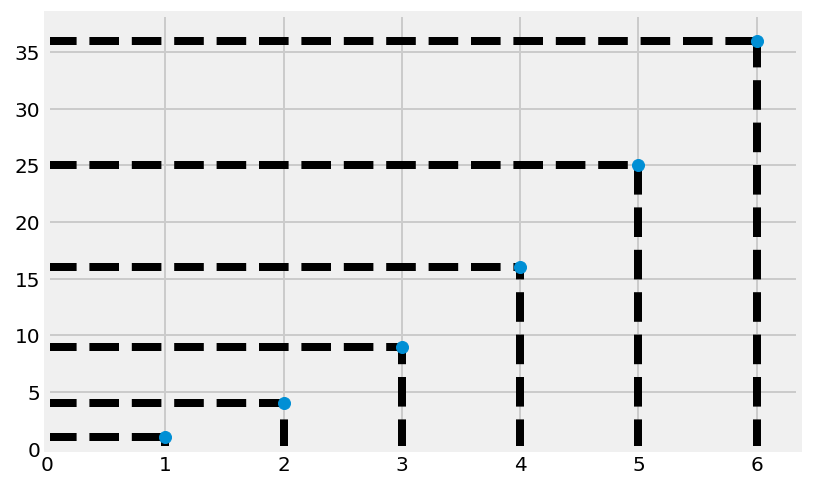

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [1,4,9,16,25,36]

plt.vlines(x, 0, y, linestyle="dashed")
plt.hlines(y, 0, x, linestyle="dashed")
plt.scatter(x, y, zorder=2)

plt.xlim(0,None)
plt.ylim(0,None)
plt.show()

## Golden Rectangles
https://blog.anvetsu.com/posts/fibonacci-golden-spiral-matplotlib-python/

In [1]:
def fibonacci(n=10):
    """ Generate pairs of fibonacci numbers upto 10 starting with 1,2 ... """

    a, b = 0,1
    for i in range(n):
        c = a + b
        yield (c,b)
        a,b=b,c

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def golden_rectangles(max_n=10):
    """ Generate and plot successive golden rectangles """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    # Create a sub-plot
    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]
    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10)
    # Turn off the axes
    plt.axis('off')

    # First rectangle is centered at (0,0)
    origin = [0, 0]

    # Rectangles
    rects = []
    
    for i,(cur_fn, prev_fn) in enumerate(fibs):
        # Plot upto max_n + 1 rectangles
        if i > max_n: break

        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 1:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, cur_fn, prev_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)

    # Add the rectangles to the plot - we need transparency
    # so that the embedded rectangles all show up   
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4,
                               edgecolor='black')

    ax.add_collection(rect_pcs)
    plt.show()

In [3]:
def fourth_series(n=10):
    """ Generate 1, 5, 9 ... upto n elements """

    x = 1
    for i in range(n):
        yield x
        x += 4

def sixth_series(n=10):
    """ Generate 4, 10, 16 ... upto n elements """

    x=4
    for i in range(n):
        yield x
        x += 6


In [9]:
%matplotlib inline
from matplotlib.patches import Arc
def golden_curve(max_n=10):
    """ Plot the golden curve """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]

    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10) 
    plt.axis('off')

    origin = [0, 0]
    p = 0

    # Data for plotting arcs
    arc_points = []
    rects = []

    # Starting offset angle
    angle = 90

    for i,(cur_fn, prev_fn) in enumerate(fibs):
        if i > max_n: break

        # Current arc's radius
        arc_radius = cur_fn

        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value          
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 0:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl          
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, prev_fn, cur_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)
        if i == 0: continue
        
        if i  % 8 == 0:
            p += 1
            continue

        if len(arc_points) == 8: continue

        r1 = rectangle
        # Calculate the rectangle's co-ordinates
        coords = [r1.get_xy(), [r1.get_x()+r1.get_width(), r1.get_y()],
                  [r1.get_x()+r1.get_width(), r1.get_y()+r1.get_height()],
                  [r1.get_x(), r1.get_y()+r1.get_height()]]

        # Successive arcs are centered on the points of rectangles
        # which is calculated as the p % 4 the item
        arc_points.append((coords[p % 4], arc_radius, angle))
        # Every turn of the spiral we go clockwise by 90 degrees
        # means the starting angle reduces by 90.
        angle -= 90

        # Reset to 0
        if angle == -360: angle = 0
        p += 3
            
    for center, radius, angle in arc_points:
        print('Plotting arc at center',center,'radius',radius, 'angle',angle)
        arc = Arc(center, radius*2, radius*2, angle=angle,
                  theta1=0, theta2=90.0, edgecolor='black',
                  antialiased=True)
        ax.add_patch(arc)
        
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4,
                              edgecolor='black')

    ax.add_collection(rect_pcs)
    
    plt.show()

Plotting arc at center (55, 0) radius 55 angle 90
Plotting arc at center [55, 21] radius 34 angle 0
Plotting arc at center [68, 21] radius 21 angle -90
Plotting arc at center [68, 13] radius 13 angle -180
Plotting arc at center (63, 13) radius 8 angle -270
Plotting arc at center [63, 16] radius 5 angle 0
Plotting arc at center [65, 16] radius 3 angle -90
Plotting arc at center [65, 14] radius 1 angle -180


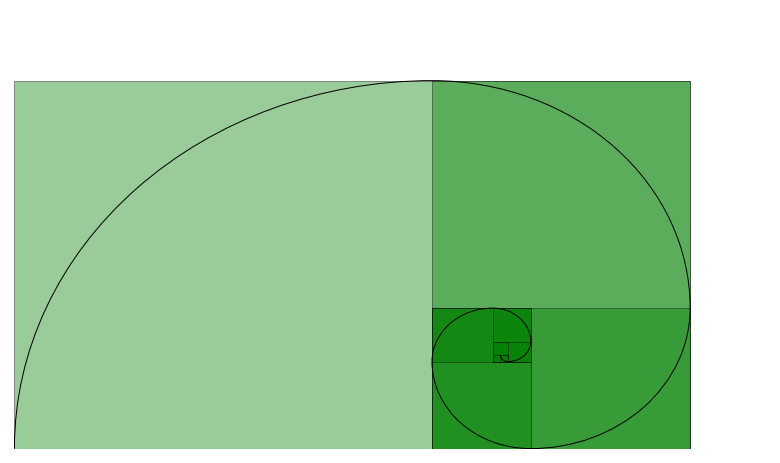

In [10]:
golden_curve()

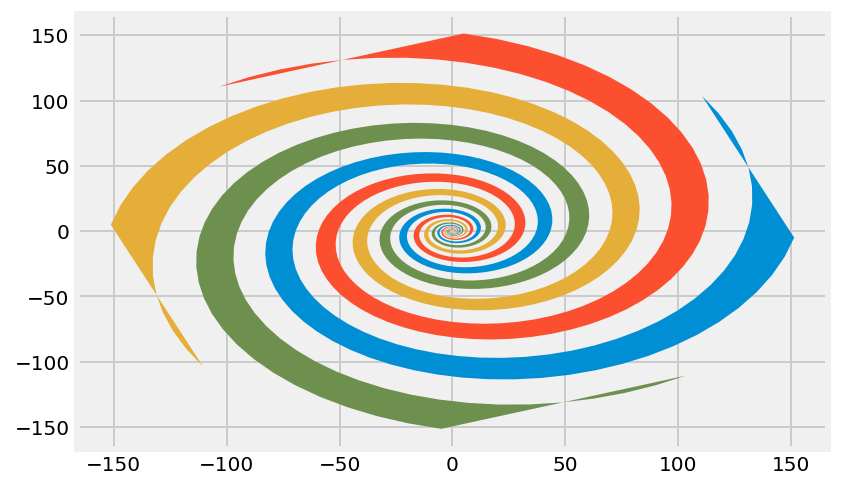

In [14]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)

plt.show()


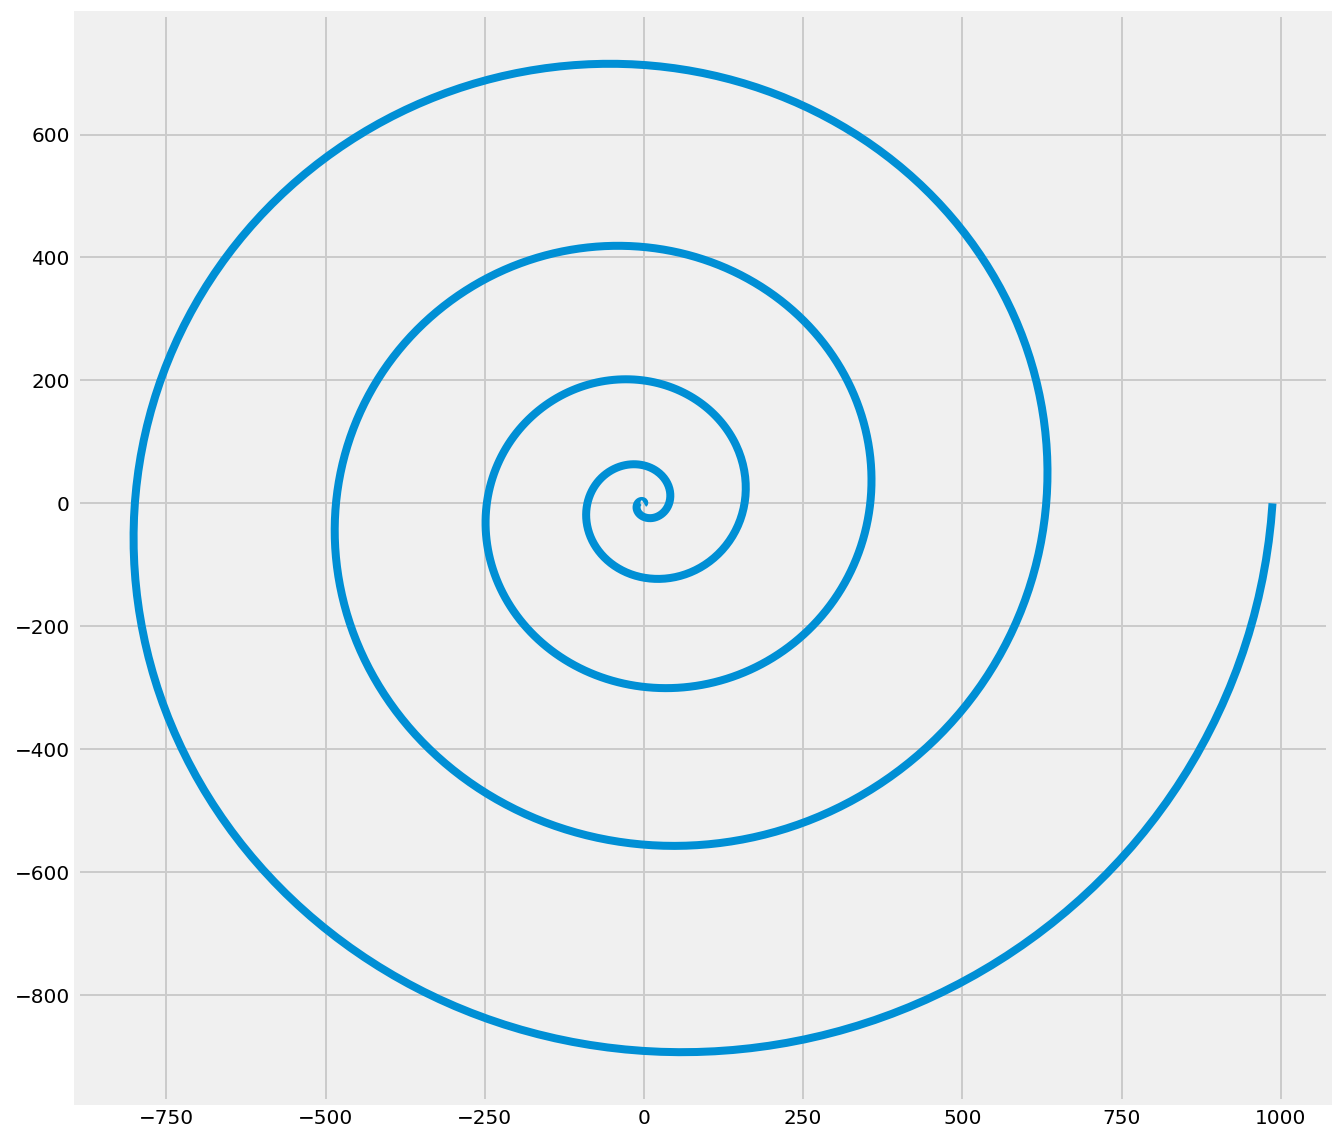

In [15]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.radians(np.linspace(0,360*5,1000))
r = theta**2
x_2 = r*np.cos(theta)
y_2 = r*np.sin(theta)
plt.figure(figsize=[10,10])
plt.plot(x_2,y_2)
plt.show()

In [ ]:
<table>
  <tr>
    <th>Header 1</th>
    <th>Header 2</th>
  </tr>
  <tr>
    <td>row 1, cell 1</td>
    <td>row 1, cell 2</td>
  </tr>
  <tr>
    <td>row 2, cell 1</td>
    <td>row 2, cell 2</td>
  </tr>
</table>